In [1]:
import scipy.io as sio
from netCDF4 import Dataset
import pickle
from scipy.interpolate import RegularGridInterpolator
import numpy as np
from pyproj import Proj, transform
from mpl_toolkits.basemap import Basemap

import scipy.io as sio
from netCDF4 import Dataset
import pickle

f='18'
loc = '/Users/mdattler/Desktop/Large_Data_Files/All_AMSR_Data/AMSR_DATA_PICKLE/'
tb18 = pickle.load(open(loc+'2017'+'_amsr_data'+f+'.p', "rb" ))
coordinates=pickle.load(open(loc+'geolocations.p', "rb" ))
# Translating Firn Data to SOUTHERN EASE-2 GRID/AMSR

latandlon = sio.loadmat('/Users/mdattler/Desktop/Large_Data_Files/FirnData/latandlon.mat')


firndata = Dataset('/Users/mdattler/Desktop/Large_Data_Files/FirnData/GSFC_FDM_rho_temp_2017.nc')


inProj = Proj(init='epsg:4326') 
outProj = Proj(init='epsg:3412')

x_amsr,y_amsr = transform(inProj,outProj,latandlon['lon'],latandlon['lat'])



In [2]:
# AMERY SUPRAGLACIAL LAKE LOCATION

lat = -66.
lon = -62.50

# x_amsr,y_amsr = transform(inProj,outProj,-170,-81)

x_lake,y_lake = transform(inProj,outProj,lon,lat)

yind=np.argmin(np.abs(coordinates['X12'][0,:]-x_lake))
xind=np.argmin(np.abs(coordinates['Y12'][:,0]-y_lake))


In [3]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt 

DATE=25

# xmin=15
# xmax=5

# ymin=1
# ymax=18

xmin=8
xmax=20

ymin=2
ymax=35

new_x = coordinates['X12'][xind-xmin:xind+xmax,yind-ymin:yind+ymax]
new_y = coordinates['Y12'][xind-xmin:xind+xmax,yind-ymin:yind+ymax]
new_z = tb18['TB_18H'][xind-xmin:xind+xmax,yind-ymin:yind+ymax,DATE]

In [4]:
new_z_t = tb18['TB_18H'][xind-xmin:xind+xmax,yind-ymin:yind+ymax,:][15,18,:]

In [5]:
a*alpha

NameError: name 'a' is not defined

NameError: name 'blep' is not defined

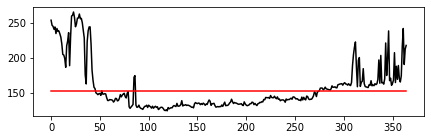

In [6]:
fig,ax = plt.subplots(1,1,figsize=(7,2))
ax.plot(new_z_t,'k',label='$T_B$')

M = new_z_t*0+np.nanmean(new_z_t[100:275])
a=3
alpha = np.nanstd(new_z_t[100:275])
T = M + a*alpha

ax.plot(T,'r',label=r"Max dry $T_{B}$ (T=M+a$\alpha$)")

import numpy as np

def runningMin(x, N):
    y = np.zeros((len(x),))*np.nan
    for ctr in range(int(N/2),len(x)-int(N/2)):
        y[ctr] = np.nanmin(x[ctr-int(N/2):ctr+int(N/2)])
    return y

# blep=runningMin(new_z_t,20)
# plt.plot(blep)

def runningMean(x, N):
    y = np.zeros((len(x),))*np.nan
    for ctr in range(int(N/2),len(x)-int(N/2)):
        y[ctr] = np.sum(x[ctr-int(N/2):ctr+int(N/2)])
    return y/N

# ax.plot(runningMean(blep,10))
# ax.plot(runningMean(blep,10)+15)
ax.fill_between(np.arange(0,365),runningMean(blep,10),y2=runningMean(blep,10)+a*alpha,color=[0.8,0.8,0.8],label='Predicted $T_B$, no melt')

ax.set_ylabel('$T_B$ (K)',fontsize=12)
sp = '            '
plt.xticks(np.arange(0,365.,30.5), [sp+'Jan',sp+'Feb',sp+'Mar',sp+'Apr',sp+'May',sp+'Jun',sp+'Jul',sp+'Aug',sp+'Sep',sp+'Oct',sp+'Nov',sp+'Dec'])

ax.set_xlim([0,365])
ax.legend()

plt.tight_layout()
plt.savefig('Predicting_Brightness_Temp.png',dpi=200)
# plt.gcf().subplots_adjust(bottom=0.3)



In [320]:
from netCDF4 import Dataset
water_bounds = Dataset('/Users/mdattler/Desktop/Large_Data_Files/FirnData/larsen_C.nc')

bounds = np.asarray(water_bounds['Band1'])
boundsnew = bounds.copy().astype('float')
boundsnew[boundsnew>90.] = np.nan


/Users/mdattler/anaconda3/envs/py3-geos/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  return array(a, dtype, copy=False, order=order)


(981249.648323751, 1318750.3462080215)

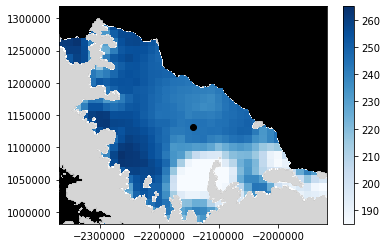

In [229]:
plt.pcolor(new_x,new_y,new_z,cmap='Blues',vmax=265,vmin=185)
plt.colorbar()
plt.pcolor(water_bounds['x'],water_bounds['y'],boundsnew,cmap='gray')
# plt.pcolor(np.asarray(water_bounds['x']),np.asarray(water_bounds['y']),water_bounds['Band1'],cmap='gray_r',vmax=20)
# plt.scatter(new_x[4,38],new_y[4,38],c='k',s=50)
plt.scatter(new_x[15,18],new_y[15,18],c='k')
plt.xlim([new_x.min(),new_x.max()])
plt.ylim([new_y.min(),new_y.max()])


In [143]:
z = firndata['temperature'][:,::7,:].shape[1]
depths = np.arange(0,z)

DATE_CFM = 4

good = ((x_amsr>new_x.min()) & (x_amsr<new_x.max()) & \
        (y_amsr>new_y.min()) & (y_amsr<new_y.max()))

good = np.squeeze(good)

temp_interp = np.zeros((new_x.shape[0],new_x.shape[1],z))*np.nan
dens_interp = np.zeros((new_x.shape[0],new_x.shape[1],z))*np.nan



for depth in depths:

    x_old = np.squeeze(x_amsr[good])
    y_old = np.squeeze(y_amsr[good])
    temp_old = np.squeeze(np.asarray(firndata['temperature'])[DATE_CFM,depth*7,np.squeeze(good)])
    dens_old = np.squeeze(np.asarray(firndata['density'])[DATE_CFM,depth*7,np.squeeze(good)])
    temp_old[temp_old<0] = np.nan
    dens_old[dens_old<0] = np.nan
    
    temp_interp[:,:,depth] = griddata((x_old[temp_old>0],y_old[temp_old>0]), temp_old[temp_old>0], (new_x, new_y), method='nearest')
    dens_interp[:,:,depth] = griddata((x_old[dens_old>0],y_old[dens_old>0]), dens_old[dens_old>0], (new_x, new_y), method='nearest')
    

/Users/mdattler/anaconda3/envs/py3-geos/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater
/Users/mdattler/anaconda3/envs/py3-geos/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


In [144]:
import scipy
f=scipy.interpolate.RegularGridInterpolator((np.asarray(water_bounds['y']),np.asarray(water_bounds['x'])),boundsnew)
                                             
themask=f((new_y,new_x))                     

temp_interp[~np.isnan(themask)] = np.nan


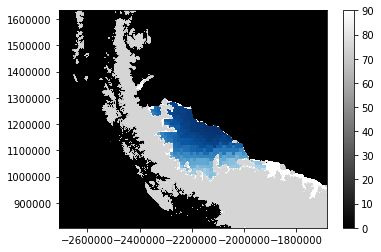

In [145]:
plt.pcolor(new_x,new_y,temp_interp[:,:,0],cmap='Blues')
plt.pcolor(water_bounds['x'],water_bounds['y'],boundsnew,cmap='gray')
plt.colorbar()


In [9]:
thicknesses=grab_thicknesses(firndata['depth'][::vertical_skip])

In [10]:
thicknesses[0:2]

masked_array(data=[0.035, 0.07 ],
             mask=False,
       fill_value=1e+20)

In [8]:
from smrt import make_snowpack, make_model, sensor_list, water_parameters, make_ice_column


def grab_thicknesses(xvalue):
    in_between = (xvalue[1:] + xvalue[:-1]) / 2
    seperators = np.append(arr = np.array([0.]), values = np.squeeze(in_between), axis= 0)
    full_seperators = np.append(arr = seperators, values = seperators[-5]+100.)
    thicknesses = np.diff(full_seperators)
    return thicknesses

vertical_skip = 7
thicknesses=grab_thicknesses(firndata['depth'][::vertical_skip])


# lwc_top = np.arange(0.,0.02,0.005)

lwc_top = np.arange(0.,0.012,0.001)

best_depth = np.zeros((dens_interp.shape[0],dens_interp.shape[1]))*np.nan
best_lwc = new_z.copy()*np.nan

for x in np.arange(0,dens_interp.shape[0]):
    for y in np.arange(0,dens_interp.shape[1]):
        if np.isnan(temp_interp[x,y,0]):
            continue
            
        difference = lwc_top*np.nan   
        
        for ind,lwc in enumerate(lwc_top):
            
            
            density = dens_interp[x,y,:]
            temp = temp_interp[x,y,:]
            lwc_column = density*0. 
            lwc_column[0:2] = lwc  
            
            snowpack = make_snowpack(thicknesses, density = density, temperature = temp,
                                                 microstructure_model = 'exponential', corr_length = 0.044,
                                                 liquid_water=lwc_column)

            m = make_model("iba", "dort")
        
            sensorH = sensor_list.amsre('18H')
            resH = m.run(sensorH, snowpack)
            difference[ind] = resH.TbH()-new_z[x,y]
    
#             if (water_depth == 0.) & (difference[ind] > 0.):
#                 break
            
        print(difference)
        plt.plot(difference)
        difference_idx = np.nanargmin(np.abs(difference))
        best_lwc[x,y] = lwc_top[difference_idx]
        print(best_lwc[x,y])

import pickle
pickle.dump({'best_lwc':best_lwc},open('larsen_C_lwc.p','wb'))

NameError: name 'dens_interp' is not defined

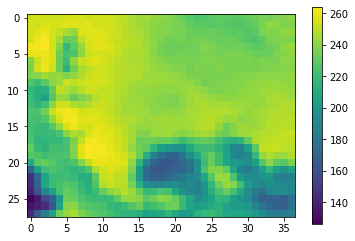

In [218]:
plt.imshow(new_z)
plt.colorbar()

In [235]:
lwc_top*917*10.5/1000

array([0.       , 0.0096285, 0.019257 , 0.0288855, 0.038514 , 0.0481425,
       0.057771 , 0.0673995, 0.077028 , 0.0866565, 0.096285 , 0.1059135])

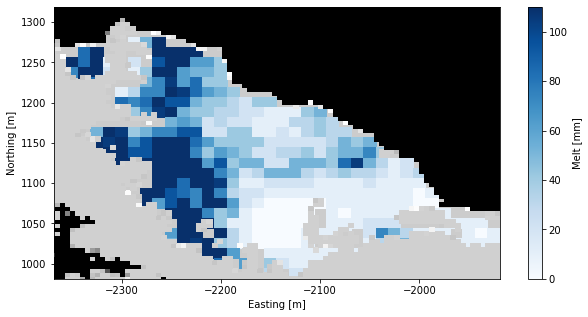

In [251]:
f,ax=plt.subplots(1,1,figsize=(10,5))

plt.pcolor(new_x/1000.,new_y/1000,best_lwc*10.5*1000,cmap='Blues',vmax=110, vmin=0)
plt.colorbar(label='Melt [mm]')
# Figure out a way to go from liquid_water to kg m-2 of water to mm w.e.
# plt.pcolor(land_bounds['x'],land_bounds['y'],land_bounds['Band1'])

plt.xlim([new_x.min()/1000,new_x.max()/1000])
plt.ylim([new_y.min()/1000,new_y.max()/1000])
plt.pcolor(np.asarray(water_bounds['x'])[::5]/1000,np.asarray(water_bounds['y'])[::5]/1000,boundsnew[::5,::5],cmap='gray',vmin=10)
# plt.pcolor(water_bounds['x'],water_bounds['y'],boundsnew,cmap='gray')
ax.set_facecolor((0.8, 0.8, 0.8))

plt.ylabel('Northing [m]')
plt.xlabel('Easting [m]')
plt.savefig('LarsenC.png',dpi=200)


In [200]:
boundsnew.shape

(812, 1006)

In [201]:
np.asarray(water_bounds['y']).shape

(812,)